In [1]:
import astropy.io.fits as fits
import numpy as np
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join
import os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import halomod as hm
import hmf
import treecorr
import DarkVerse as dv


%matplotlib inline
plt.rc('font',**{'family':'serif','size':14})
#plt.rc('text', usetex=True)

ModuleNotFoundError: No module named 'treecorr'

In [ ]:
home_dir = os.path.expanduser('~')
directory_SN_X3 = "/home/astro/manasoi7/Master_Thesis/Results/SN-X3"
directory_SN_C3 = "/home/astro/manasoi7/Master_Thesis/Results/SN-C3"
directory_SN_E2 = "/home/astro/manasoi7/Master_Thesis/Results/SN-E2" 
directory_COSMOS = "/home/astro/manasoi7/Master_Thesis/Results/COSMOS" 
res = os.path.join(home_dir, 'Master_Thesis', 'Results')

In [ ]:

home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Otilia', 'DATA')



# Catalog
fits_file_path = os.path.join(thesis_path, "DES_DF_SN-C3_sbi_output.fits")  
t= Table.read(fits_file_path)
masked_file_path = os.path.join(thesis_path, "SN-C3_masked_cat.fits")  
t3= Table.read(masked_file_path)

# Join in one table

t=join(t,t3,keys='id') 
t.rename_column('mode_z','z')
t.rename_column('mode_mass','SM')


# Load Randoms
fits_random = os.path.join(thesis_path, "SN-C3_randoms_ugriz_trim_video.fits") 
t2 = Table.read(fits_random)
randoms = t2  # Random catalog

# Define Correlation Function Configuration
config = {
    'min_sep': 0.003, 
    'max_sep': 1.78,
    'bin_size': 0.2,
    'sep_units': 'degrees',
    'var_method': 'shot'   # if using the internal 'var_method': 'bootstrap' of treecrorr, but then it takes a long time to run
}



In [ ]:

z_min, z_max = 0.4, 0.6
SM_min, SM_max = 10, 12.5
    
sub1 = dv.Selection(t, randoms,z_min, z_max,SM_min, SM_max, config)    # if i put the upper limit at 12.5 logSM then it is considered open-ended

# Fit HOD with custom bounds
#hod_params, pcov = sub1.fit_hod()  #  p0=[12.5, 13.5, 1.0], bounds = ([11.0*1e-7, 12.5, 0.99], [14.5*1e-7, 15.5, 1.01]) # fix alpha to 1
hod_params, pcov = sub1.fit_hod(p0=[12.3*1e-7, 13.5, 1.0]) 


results = sub1.get_results()

logM_min, logM_1, alpha = results['hod_params']
print(f"HOD fit results: M_min = 10^{logM_min*1e7:.2f}, "
      f"M_1 = 10^{logM_1:.2f}, alpha = {alpha:.2f}")

In [ ]:
theta = results['theta']
w_obs = results['w_theta']
var_w_obs= results['var_w_theta_bootstrap']
w_err = np.sqrt(var_w_obs)
xi_m_values = results['xi_m']
xi_g_values = results['xi_g']

# Model prediction with best-fit parameters
w_model = sub1.hod_model(logM_min *1e7, logM_1, alpha) 

plt.figure(figsize=(10, 8))

plt.errorbar(theta, w_obs, yerr= w_err, fmt='o', label= 'SN-C3')
plt.plot(theta, w_model, label='Best-fit HOD Model', color='red')

#plt.plot(theta, xi_m_values, label=r'$\w_{dm}(\theta)$ (Matter-Matter)', linestyle='dashed', color='black')
#plt.plot(theta, xi_g_values, label=r'(Galaxy-Galaxy) corr. function', linestyle='dashed', color='blueviolet')


plt.xscale('log')
plt.yscale('log')
#plt.ylim([1e-4,10.])

plt.xlabel('θ [degrees]', fontsize=12)
plt.ylabel('w(θ)', fontsize=12)
plt.title(f'$w(\\theta)$ of SN-C3 for $10^{{{SM_min}}} < M_* < 10^{{{SM_max}}}$, $z \in [{z_min},{z_max}]$', fontsize=14)

plt.legend(fontsize=10, framealpha=0.8)
plt.grid(True, which="both", ls="--", alpha=0.3)

# Add annotations
plt.text(0.2, 0.9, "1-halo region", transform=plt.gca().transAxes, color='gray')
plt.text(0.6, 0.9, "2-halo region", transform=plt.gca().transAxes, color='gray')

plt.savefig(f"wtheta_SN_C3_HOD_SM_{SM_min}_{SM_max}_{z_min}_{z_max}.png")

plt.tight_layout()
plt.show()



HOD fit results: M_min = 10^12.27, M_1 = 10^13.80, alpha = 1.18


In [6]:
results = sub1.get_results()

# Extract values
A = results['power_law_params'][0][0]
z_mean = (sub1.z_min + sub1.z_max) / 2
delta_z = sub1.z_max - sub1.z_min
delta = 0.8  



In [7]:
analysis = dv.SubsampleAnalysis(delta=delta, A=A, z_mean=z_mean, delta_z=delta_z)

r0 = analysis.calculate_r0()

print(f"Comoving correlation length r₀ = {r0:.2f} Mpc/h")

<class 'numpy.float64'>
1.8
Comoving correlation length r₀ = 7.93 Mpc/h


Processing bin: z=(0.2, 0.4), logSM=(9.5, 10)


<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\i'
<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:56: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_352667/2177104596.py:50: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(results['theta'], A*results['theta']**(-0.8), label='powerlaw, $\delta=-0.8$', color='red')
/tmp/ipykernel_352667/2177104596.py:56: SyntaxWarning: invalid escape sequence '\i'
  plt.title(f'$w(\\theta)$ of SN-C3 for $10^{{{SM_min}}} < M_* < 10^{{{SM_max}}}$, $z \in [{z_min},{z_max}]$', fontsize=14)


<class 'numpy.float64'>
1.8
amplitude: 0.00958, pm 0.00140
  → r₀ = 7.81 Mpc/h


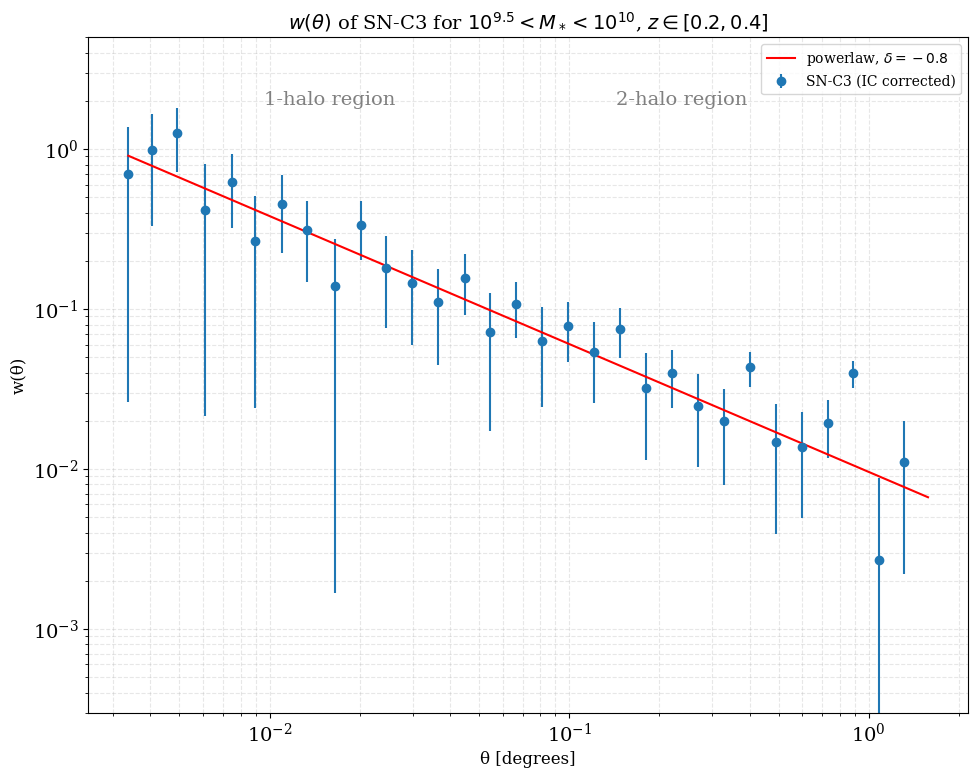

Processing bin: z=(0.2, 0.4), logSM=(10, 10.5)
The following patch numbers have no objects: {22}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.01040, pm 0.00167
  → r₀ = 8.17 Mpc/h


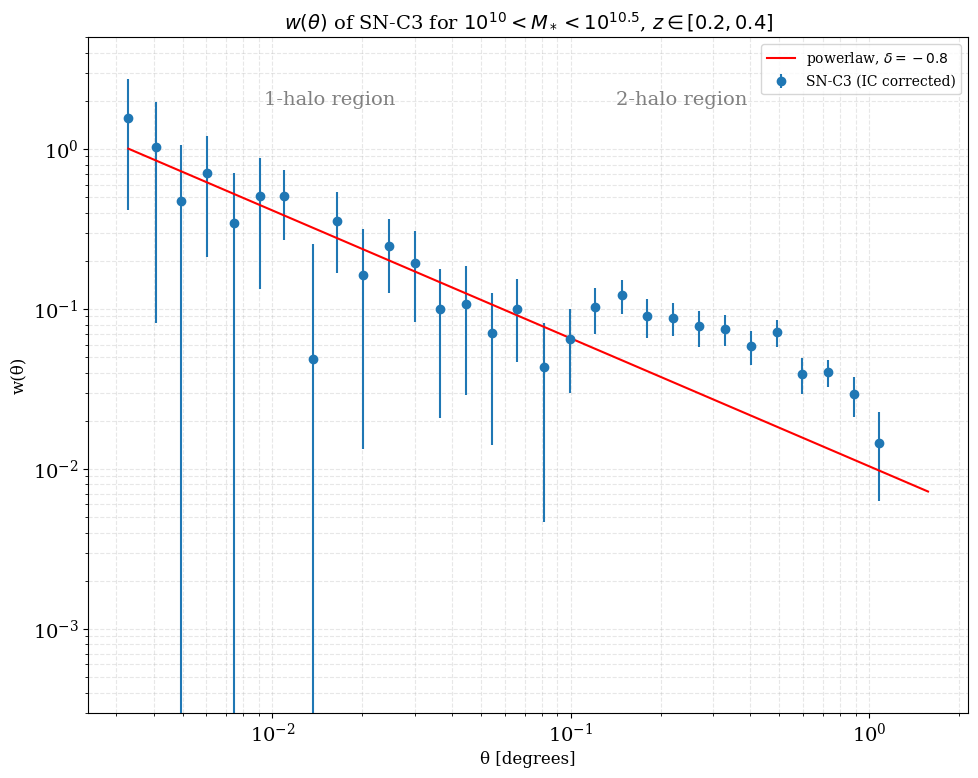

Processing bin: z=(0.2, 0.4), logSM=(10.5, 12.5)
The following patch numbers have no objects: {4}
This may be a problem depending on your use case.
The following patch numbers have no objects: {41}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.01338, pm 0.00265
  → r₀ = 9.40 Mpc/h


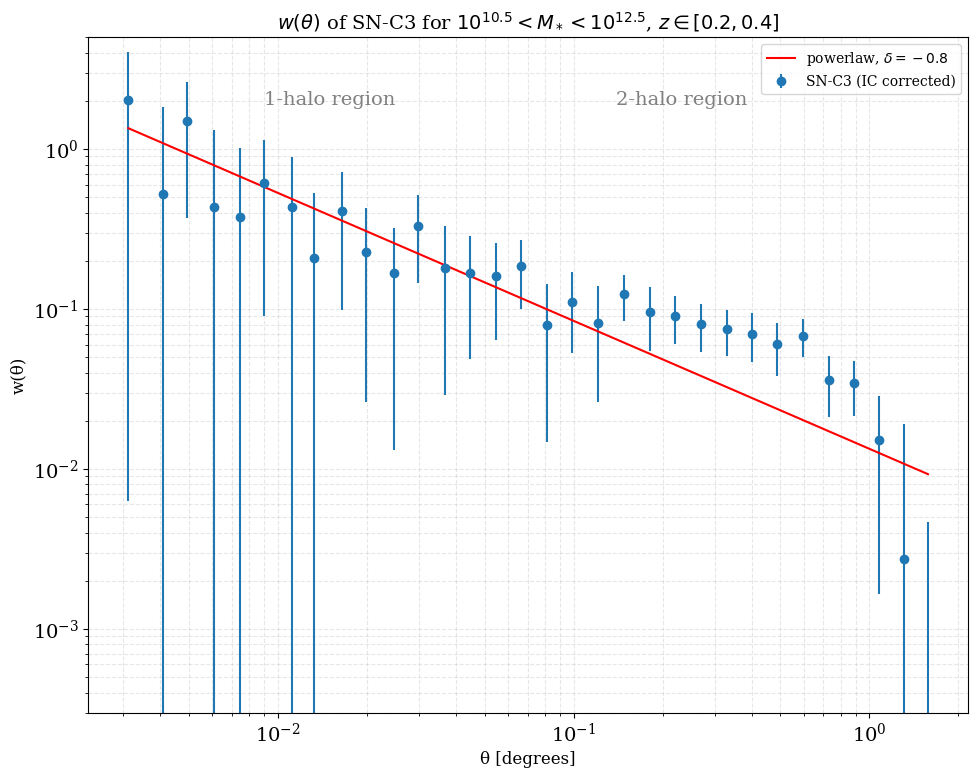

Processing bin: z=(0.4, 0.6), logSM=(9.5, 10)
<class 'numpy.float64'>
1.8
amplitude: 0.00750, pm 0.00095
  → r₀ = 7.43 Mpc/h


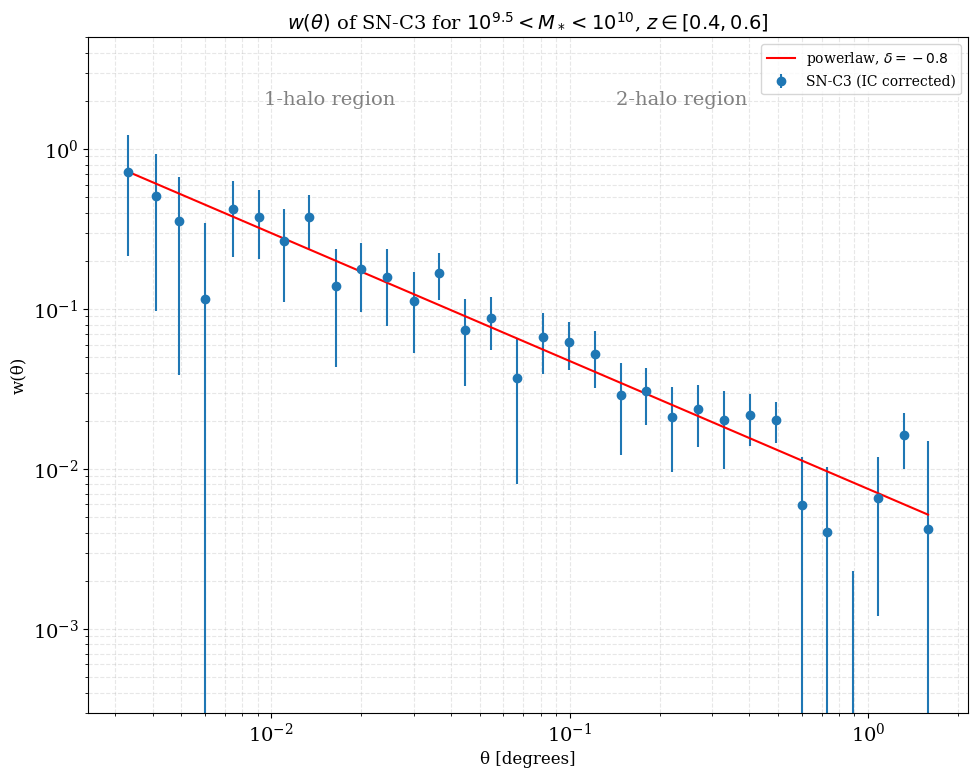

Processing bin: z=(0.4, 0.6), logSM=(10, 10.5)
<class 'numpy.float64'>
1.8
amplitude: 0.00476, pm 0.00132
  → r₀ = 5.77 Mpc/h


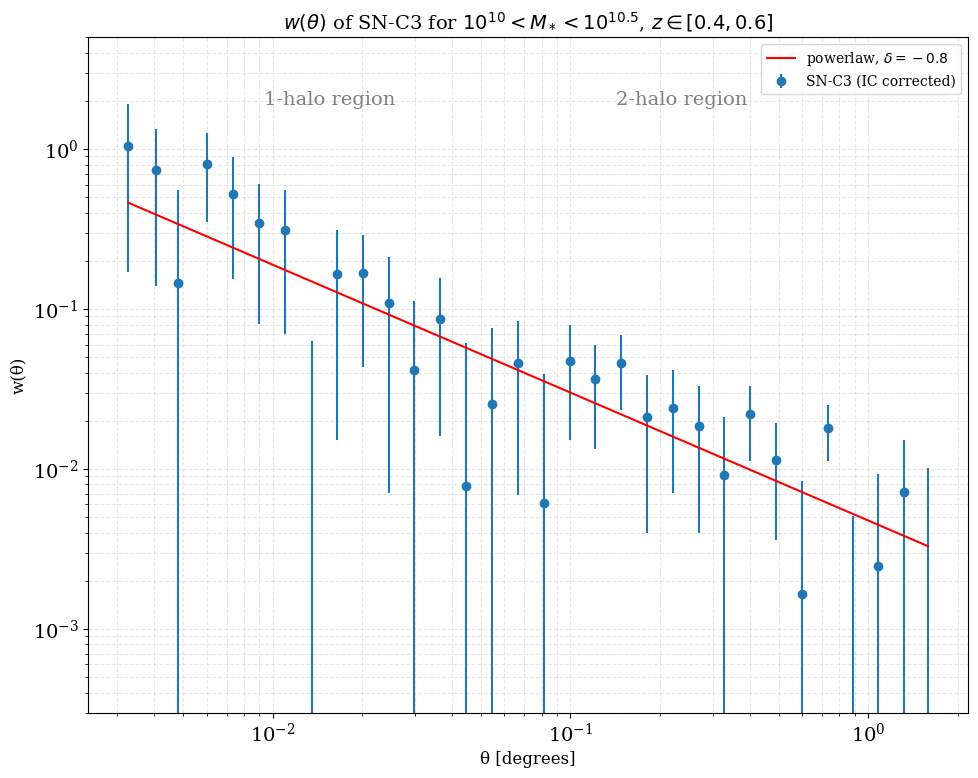

Processing bin: z=(0.4, 0.6), logSM=(10.5, 12.5)
The following patch numbers have no objects: {27}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.01111, pm 0.00164
  → r₀ = 9.24 Mpc/h


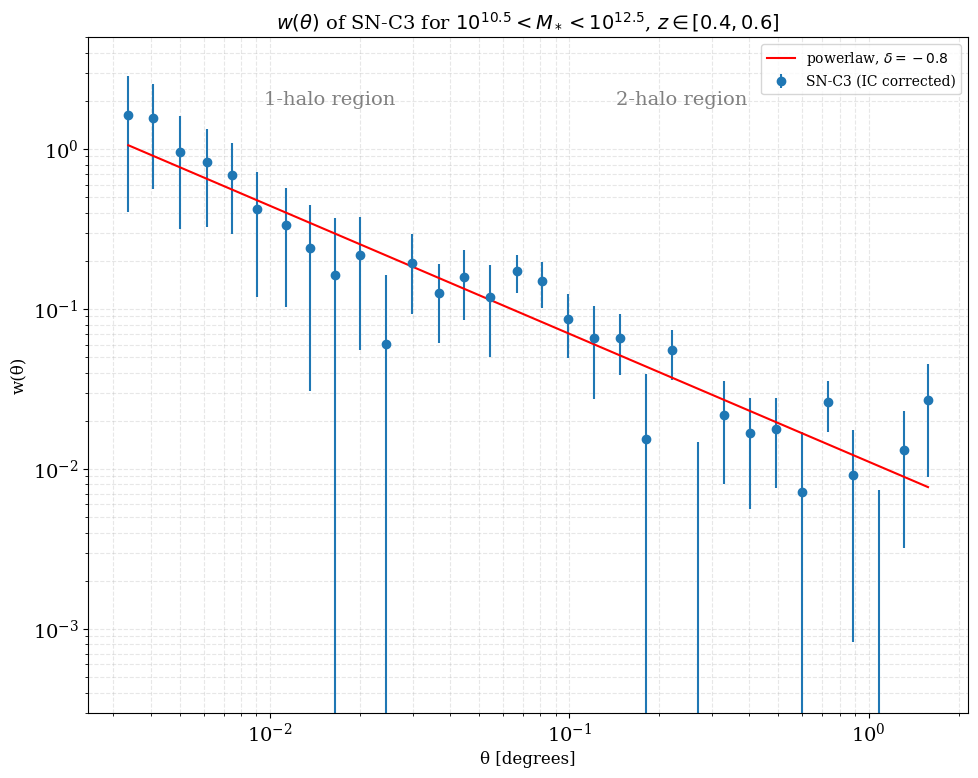

Processing bin: z=(0.6, 0.8), logSM=(9.5, 10)
The following patch numbers have no objects: {41}
This may be a problem depending on your use case.
The following patch numbers have no objects: {41}
This may be a problem depending on your use case.
The following patch numbers have no objects: {42}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.00896, pm 0.00052
  → r₀ = 8.39 Mpc/h


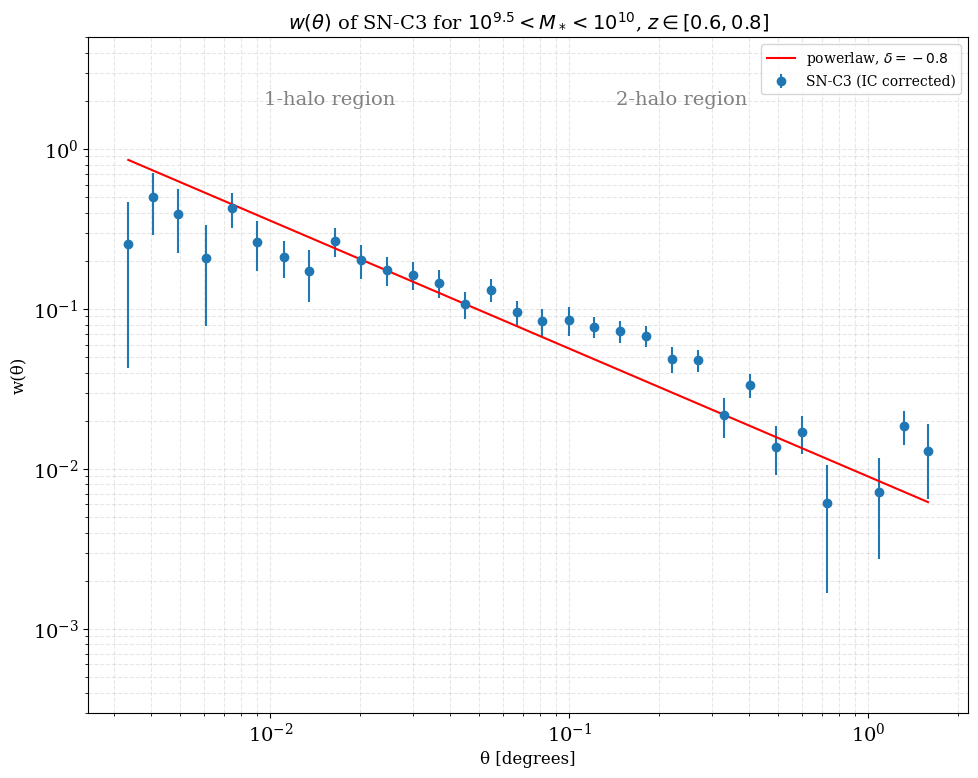

Processing bin: z=(0.6, 0.8), logSM=(10, 10.5)
<class 'numpy.float64'>
1.8
amplitude: 0.01138, pm 0.00069
  → r₀ = 9.58 Mpc/h


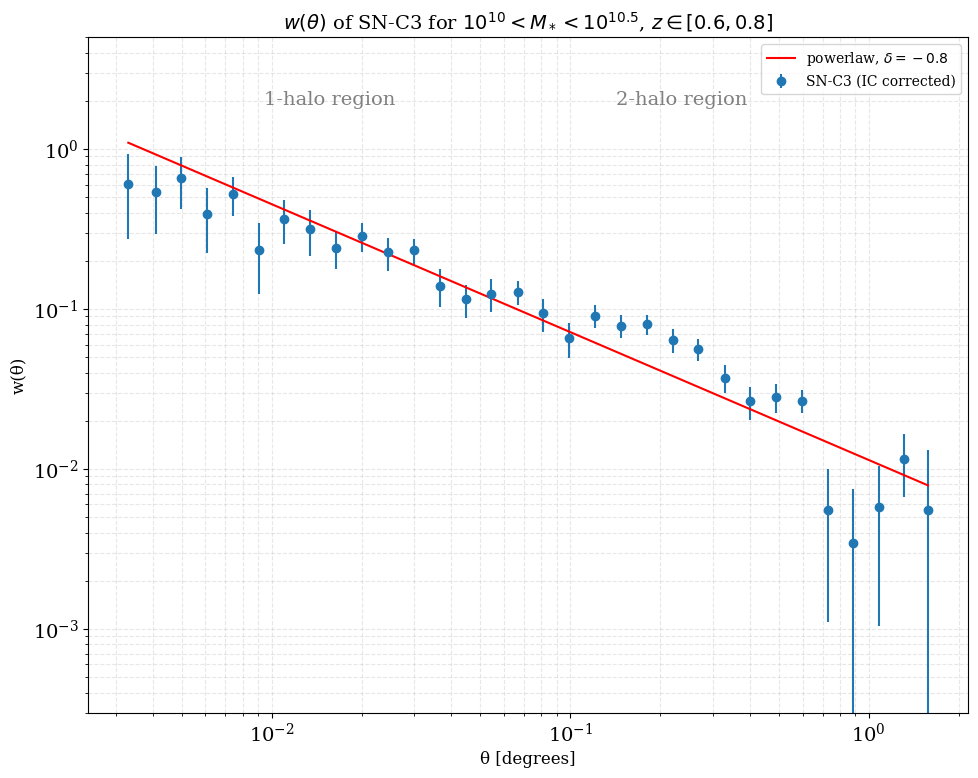

Processing bin: z=(0.6, 0.8), logSM=(10.5, 12.5)
The following patch numbers have no objects: {41}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.01467, pm 0.00079
  → r₀ = 11.03 Mpc/h


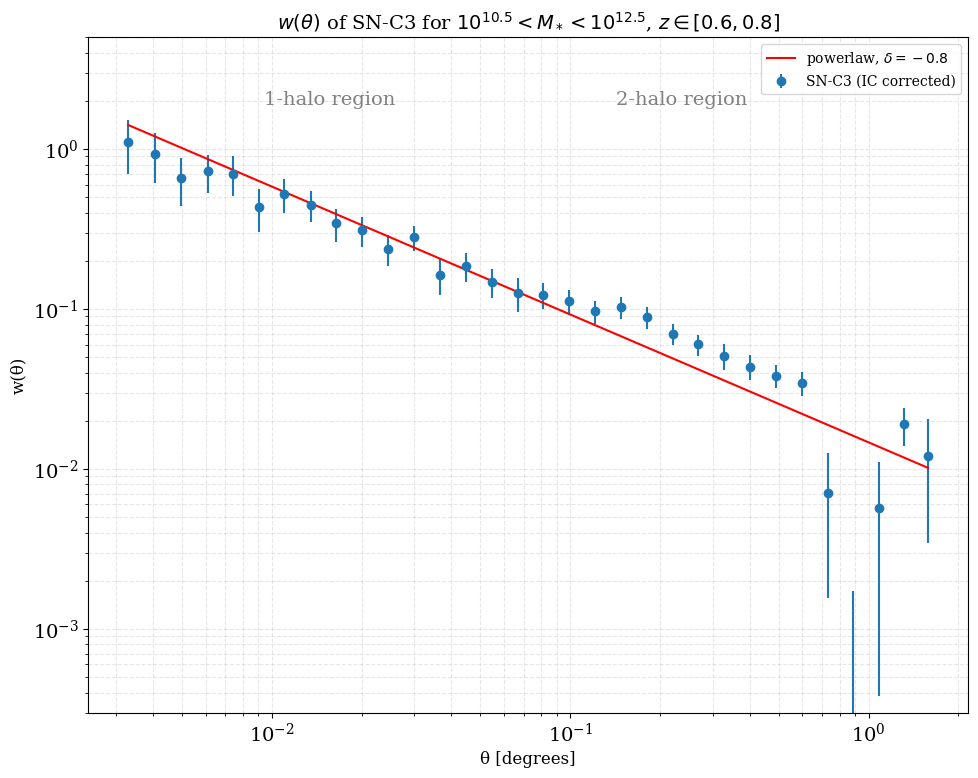

Processing bin: z=(0.8, 1.0), logSM=(9.5, 10)
<class 'numpy.float64'>
1.8
amplitude: 0.00486, pm 0.00041
  → r₀ = 5.94 Mpc/h


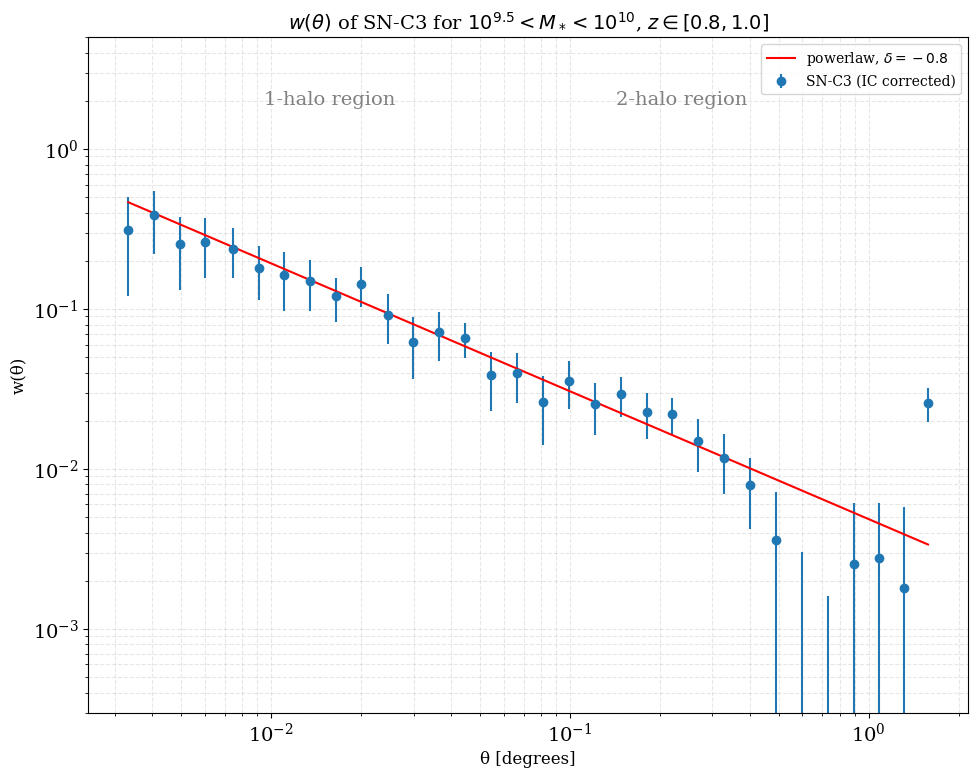

Processing bin: z=(0.8, 1.0), logSM=(10, 10.5)
<class 'numpy.float64'>
1.8
amplitude: 0.00504, pm 0.00058
  → r₀ = 6.06 Mpc/h


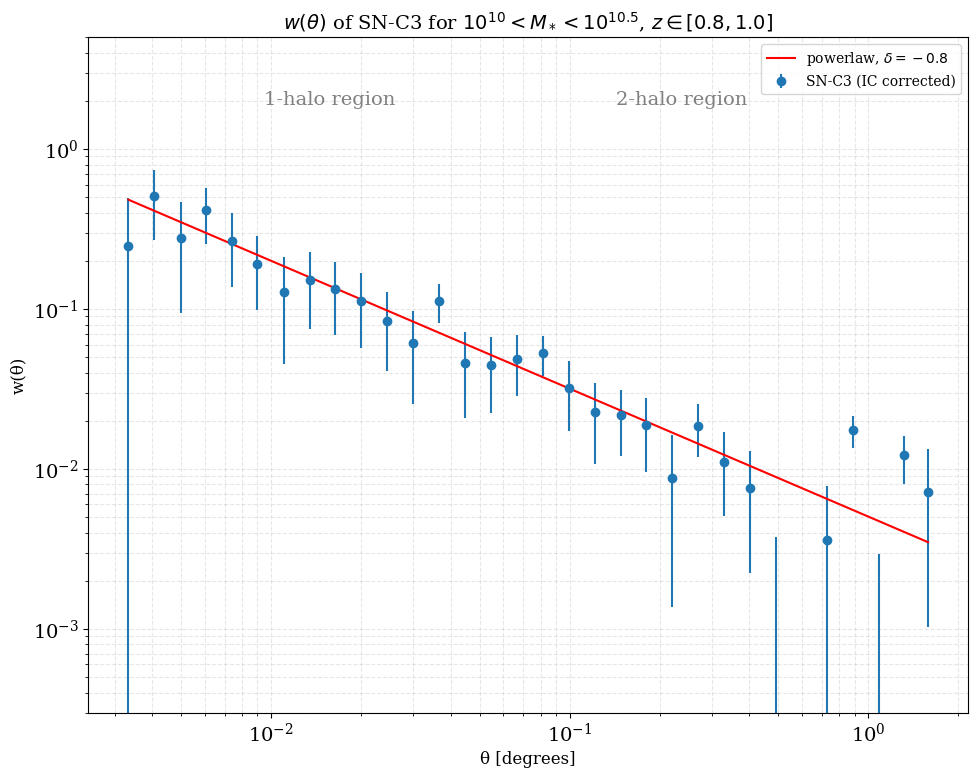

Processing bin: z=(0.8, 1.0), logSM=(10.5, 12.5)
The following patch numbers have no objects: {27}
This may be a problem depending on your use case.
The following patch numbers have no objects: {28}
This may be a problem depending on your use case.
<class 'numpy.float64'>
1.8
amplitude: 0.00639, pm 0.00058
  → r₀ = 6.92 Mpc/h


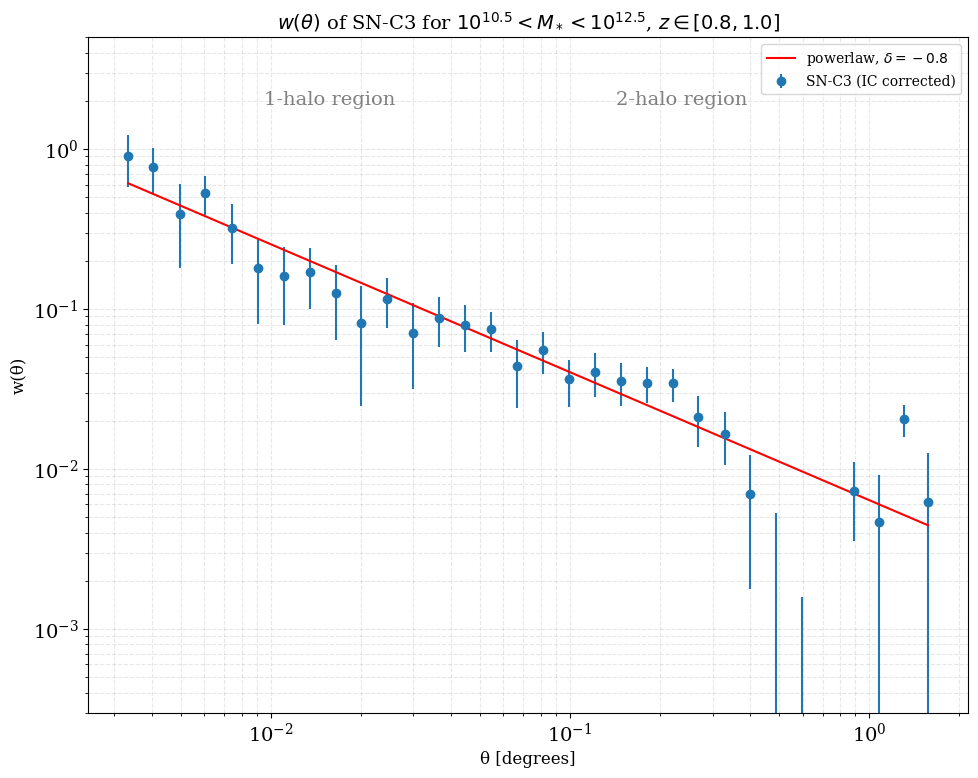

In [8]:
# Define redshift and stellar mass bins
z_bins = [(0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0)]
#SM_bins = [(9, 12.5), (10, 12.), (11.0, 12.5)]
SM_bins = [(9.5, 10), (10, 10.5), (10.5, 12.5)]


r0_results = []

for z_min, z_max in z_bins:
    for SM_min, SM_max in SM_bins:
        print(f"Processing bin: z=({z_min}, {z_max}), logSM=({SM_min}, {SM_max})")

        try:
            sub = dv.Selection(catalog=t, randoms=randoms,
                            z_min=z_min, z_max=z_max,
                            SM_min=SM_min, SM_max=SM_max,
                            config=config)
            
            # Fit HOD
            hod_params, _ = sub.fit_hod()
            results = sub.get_results()
            
            # Extract parameters for r0 calculation
            A = results['power_law_params'][0][0]
            frac_err = np.sqrt(results['power_law_params'][1][0,0]) / A
            z_mean = (z_min + z_max) / 2
            delta_z = z_max - z_min
            delta = 0.8  # or estimate from sample normalization
            
            # Compute r0
            analysis = dv.SubsampleAnalysis(delta=delta, A=A, z_mean=z_mean, delta_z=delta_z)
            r0 = analysis.calculate_r0()

            print("amplitude: {:.5f}, pm {:.5f}".format(A, A*frac_err))
            print(f"  → r₀ = {r0:.2f} Mpc/h")

            r0_results.append({
                'z_min': z_min,
                'z_max': z_max,
                'SM_min': SM_min,
                'SM_max': SM_max,
                'r0': r0,
                'N': results['N'], 
                'r0_err': frac_err * r0
            })

            plt.figure(figsize=(10, 8))
            plt.errorbar(results['theta'], results['w_theta'] + sub.IC, yerr=np.sqrt(results['var_w_theta_bootstrap']), 
                            fmt='o', label= 'SN-C3 (IC corrected)')
            plt.plot(results['theta'], A*results['theta']**(-0.8), label='powerlaw, $\delta=-0.8$', color='red')
            plt.xscale('log')
            plt.yscale('log')            
            plt.xlabel('θ [degrees]', fontsize=12)
            plt.ylabel('w(θ)', fontsize=12)
            plt.ylim([3e-4,5.])
            plt.title(f'$w(\\theta)$ of SN-C3 for $10^{{{SM_min}}} < M_* < 10^{{{SM_max}}}$, $z \in [{z_min},{z_max}]$', fontsize=14)            
            plt.legend(fontsize=10, framealpha=0.8)
            plt.grid(True, which="both", ls="--", alpha=0.3)        
            # Add annotations
            plt.text(0.2, 0.9, "1-halo region", transform=plt.gca().transAxes, color='gray')
            plt.text(0.6, 0.9, "2-halo region", transform=plt.gca().transAxes, color='gray')            
            plt.tight_layout()
            plt.show()
        
        except Exception as e:
            print(f"  ⚠️ Failed for bin (z=({z_min}, {z_max}), logSM=({SM_min}, {SM_max})): {e}")


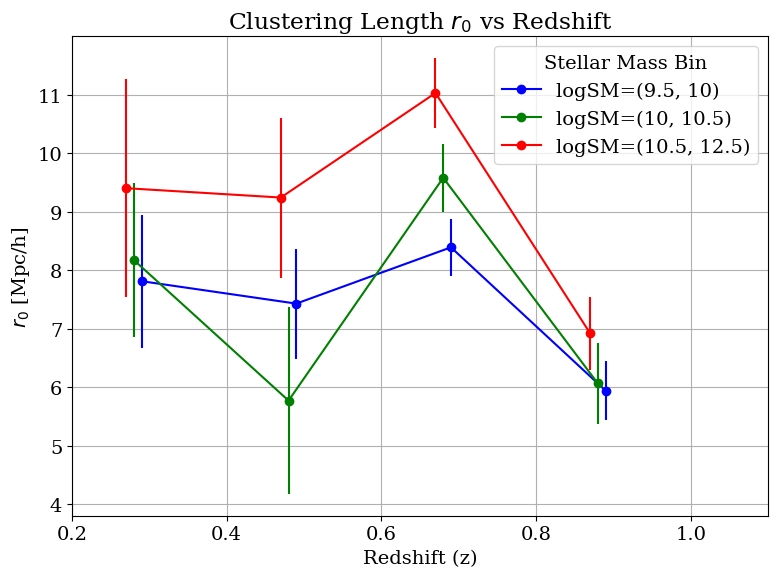

In [9]:
c = ['b', 'g', 'r']

# Group r0 results by stellar mass threshold
from collections import defaultdict
import numpy as np

# Organize r0 results by stellar mass bins
grouped = defaultdict(list)
for res in r0_results:
    sm_key = (res['SM_min'], res['SM_max'])
    z_mean = (res['z_min'] + res['z_max']) / 2
    grouped[sm_key].append((z_mean, res['r0'], res['r0_err']))

plt.figure(figsize=(8,6))

i = 0
for sm_bin, data in grouped.items():
    data.sort()
    z_vals, r0_vals, r0_errs = zip(*data)
    plt.plot(np.array(z_vals)-(0.01+0.01*i), r0_vals, marker='o', label=f"logSM=({sm_bin[0]}, {sm_bin[1]})", color=c[i])
    plt.errorbar(np.array(z_vals)-(0.01+0.01*i), r0_vals, fmt='.', yerr=r0_errs, color=c[i])
    i += 1

plt.xlim([0.2,1.1])
plt.xlabel('Redshift (z)')
plt.ylabel(r'$r_0$ [Mpc/h]')
plt.title(r'Clustering Length $r_0$ vs Redshift')
plt.legend(title='Stellar Mass Bin')
plt.grid(True)
plt.tight_layout()
plt.savefig("SN-C3_r0.png")
plt.show()


In [10]:
# Following Mo & White (2002) and Peebles (1980):

# Can use growth factor to get correct sigma8 at different redshifts for DM.
def gz(z): 
    g = (5/2)*LCDM.Om(z) / (LCDM.Om(z)**(4/7) - LCDM.Ode(z) + (1+LCDM.Om(z)/2.)*(1+LCDM.Ode(z)/70.))
    return g


def growth_factor(z):
    Dz = gz(z) / (gz(0)*(1+z))
    return Dz

LCDM = FlatLambdaCDM(H0=67, Om0=0.3)
sigma8 = 0.829 # Planck15

gamma = 1.8
C_gamma = 72/((3-gamma)*(4-gamma)*(6-gamma)*2**(gamma))


In [11]:
# Organize r0 results by stellar mass bins
grouped = defaultdict(list)
for res in r0_results:
    sm_key = (res['SM_min'], res['SM_max'])
    z_mean = (res['z_min'] + res['z_max']) / 2
    del8 = (C_gamma * (res['r0']/8.)**(gamma))**(1/2)
    mean_bias = del8 / (sigma8*growth_factor(z_mean))
    bias_err = (res['r0_err'] / (res['r0'])**0.1) * (0.9 * C_gamma**(0.5) * (1/8)**0.9) / (sigma8 * growth_factor(z_mean))
    grouped[sm_key].append((z_mean, mean_bias, bias_err, res['r0'], res['r0_err'])) # 

import pickle
with open('SN-C3_r0_data.pkl','bw') as fout:
    pickle.dump(grouped, fout)

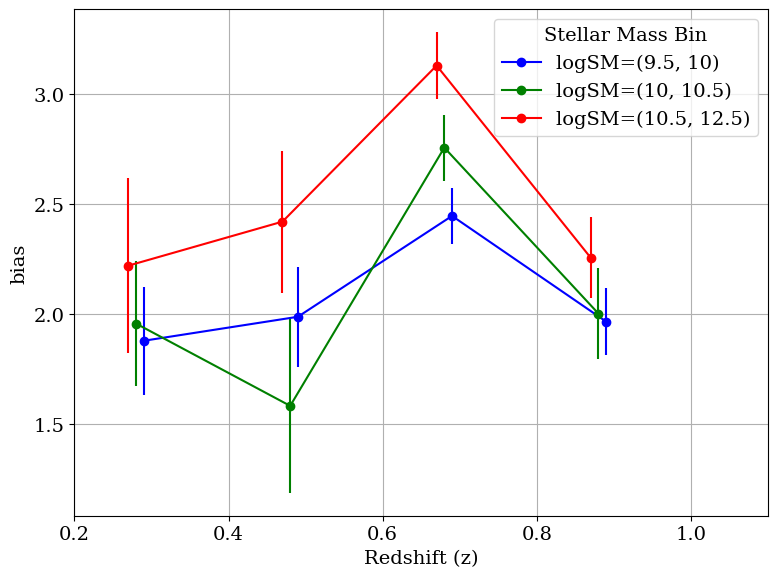

In [12]:
plt.figure(figsize=(8,6))

i = 0
for sm_bin, data in grouped.items():
    data.sort()
    z_vals, mean_bias, bias_err, _, __ = zip(*data)
    plt.plot(np.array(z_vals)-(0.01+0.01*i), mean_bias, marker='o', label=f"logSM=({sm_bin[0]}, {sm_bin[1]})", color=c[i])
    plt.errorbar(np.array(z_vals)-(0.01+0.01*i), mean_bias, fmt='.', yerr=bias_err, color=c[i])
    i += 1

plt.xlim([0.2,1.1])
plt.xlabel('Redshift (z)')
plt.ylabel(r'bias')
#plt.title(r'bias from $r_0$ vs Redshift')
plt.legend(title='Stellar Mass Bin')
plt.grid(True)
plt.tight_layout()
plt.savefig("SN-C3_bias_from_r0.png")
plt.show()